In [189]:
import pandas as pd
import numpy as np

In [190]:
all_qbs = pd.read_csv('qb.csv')

In [191]:
qbs = ['Tom Brady', 'Drew Brees', 'Philip Rivers', 'Eli Manning',
      'Ben Roethlisberger', 'Aaron Rodgers', 'Peyton Manning']

In [192]:
select_qbs = all_qbs[all_qbs['name'].isin(qbs)][['name', 'fpts', 'year']]

In [193]:
select_qbs.groupby(['name', 'year']).sum().to_csv('test.csv')

In [194]:
test = pd.read_csv('select_qbs.csv')

In [195]:
df = pd.DataFrame(0, index=np.arange(len(test['year'].unique())), columns=['year']+qbs)

In [196]:
df['year'] = test['year'].unique()

In [197]:
for row in df.iterrows():
    for qb in qbs:
        try: 
            fpts = test[test['name']==qb].groupby(['year'])['fpts'].sum().loc[row[1]['year']]
            df.at[row[0], qb] = fpts
        except:
            pass

In [201]:
df.sort_values(['year'], inplace=True)

In [202]:
df.to_csv('fpts_per_year.csv', index=False)

In [203]:
df.head()

,year,Tom Brady,Drew Brees,Philip Rivers,Eli Manning,Ben Roethlisberger,Aaron Rodgers,Peyton Manning
18,2000,0,0,0,0,0,0,370
15,2001,218,16,0,0,0,0,350
16,2002,317,251,0,0,0,0,345
17,2003,285,158,0,0,0,0,332
14,2004,299,286,5,79,219,0,427


In [204]:
import matplotlib.pyplot as plt

,year,name,fpts
0,2005,Aaron Rodgers,4.0
1,2006,Aaron Rodgers,3.4
2,2007,Aaron Rodgers,17.9
3,2008,Aaron Rodgers,358.8
4,2009,Aaron Rodgers,402.5
5,2010,Aaron Rodgers,368.1
6,2011,Aaron Rodgers,456.3
7,2012,Aaron Rodgers,409.5
8,2013,Aaron Rodgers,207.0
9,2014,Aaron Rodgers,410.3


In [237]:
labs = []
for x in range(0, 19):
    if len(str(x)) == 1: 
        x = '0' + str(x)
    x = "'" + str(x)
    labs.append(x)

Text(0.5,0,'Year 20__')

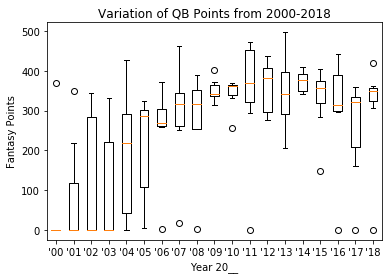

In [240]:
plt.boxplot(df.drop('year', axis=1))
plt.xticks(list(range(1,20)), labs)
plt.title('Variation of QB Points from 2000-2018')
plt.ylabel('Fantasy Points')
plt.xlabel('Year 20__')

In [114]:
df.at[5, 'Tom Brady'] = 10

In [ ]:
df.head()

In [112]:
df[(df['Time'] == 2000.0625)]['Tom Brady'] = 10

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [121]:
for qb in qbs: 
    df[qb] = df[qb].cumsum()

In [123]:
df.to_csv('select_qbs.csv', index=False)

In [125]:
select_qbs

,name,fpts,timestamp
12,Peyton Manning,17.4,2000.0625
42,Peyton Manning,32.4,2000.1250
123,Peyton Manning,38.4,2000.2500
181,Peyton Manning,19.5,2000.3125
214,Peyton Manning,21.4,2000.3750
259,Peyton Manning,18.1,2000.4375
291,Peyton Manning,25.4,2000.5000
332,Peyton Manning,26.4,2000.5625
371,Peyton Manning,25.3,2000.6250
425,Peyton Manning,14.7,2000.6875


In [108]:
df[0]['Tom Brady'] = 10

KeyError: 0

In [115]:
df

,Time,Tom Brady,Drew Brees,Philip Rivers,Eli Manning,Ben Roethlisberger,Aaron Rodgers,Peyton Manning
0,2000.0625,0,0,0,0,0,0,0
1,2000.1250,0,0,0,0,0,0,0
2,2000.2500,0,0,0,0,0,0,0
3,2000.3125,0,0,0,0,0,0,0
4,2000.3750,0,0,0,0,0,0,0
5,2000.4375,10,0,0,0,0,0,0
6,2000.5000,0,0,0,0,0,0,0
7,2000.5625,0,0,0,0,0,0,0
8,2000.6250,0,0,0,0,0,0,0
9,2000.6875,0,0,0,0,0,0,0
